In [1]:
from salishsea_tools import evaltools as et
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import pickle

%matplotlib inline

### Note: Summer only

In [2]:
df=et.loadDFOCTD(datelims=(dt.datetime(2015,6,1),dt.datetime(2015,9,1)))

In [3]:
print(len(df))
df.dropna(subset=['Fluor'],inplace=True)
print(len(df))

54669
41248


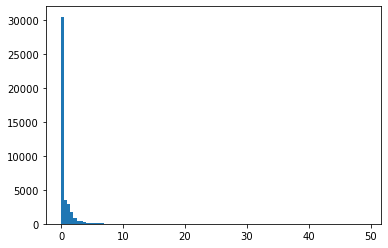

In [4]:
plt.hist(df['Fluor'],100);

In [5]:
# path to model files:
PATH= '/results2/SalishSea/nowcast-green.201905/'

# start and end dates for analysis:
start_date = dt.datetime(2015,6,1)
end_date = dt.datetime(2015,9,1)

# number of days per model file:
flen=1

# dictionary mapping desired model variables to the file types where they are found
#filemap={'vosaline':'grid_T','votemper':'grid_T'}
filemap={'diatoms':'ptrc_T','ciliates':'ptrc_T','flagellates':'ptrc_T'}

# dictionary mapping model file types to their time resolution in hours (1 is hourly files, 24 is daily)
fdict={'ptrc_T':1,'grid_T':1}

# results format
# -- nowcast: files like 01jan15/SalishSea_1h_20150101_20150101_ptrc_T.nc
# -- long: files like SalishSea_1h_20150206_20150804_ptrc_T_20150427-20150506.nc, all in one directory
namfmt='nowcast'

data=et.matchData(df,filemap,fdict,start_date,end_date,namfmt,PATH)

(Lat,Lon)= 49.01133333333333 -125.17  not matched to domain
(Lat,Lon)= 49.021 -125.15616666666666  not matched to domain
(Lat,Lon)= 49.0295 -125.15266666666666  not matched to domain
(Lat,Lon)= 49.042833333333334 -125.15266666666666  not matched to domain
(Lat,Lon)= 49.0525 -125.143  not matched to domain
(Lat,Lon)= 49.071333333333335 -125.15683333333334  not matched to domain
(Lat,Lon)= 49.08316666666666 -125.17166666666667  not matched to domain
(Lat,Lon)= 49.09166666666667 -125.19466666666666  not matched to domain
(Lat,Lon)= 50.45713333333333 -126.16475  not matched to domain
(Lat,Lon)= 50.45718333333333 -126.16443333333333  not matched to domain
(Lat,Lon)= 50.45745 -126.16433333333333  not matched to domain
(Lat,Lon)= 50.48383333333334 -126.18633333333334  not matched to domain
(Lat,Lon)= 51.67483333333333 -127.28466666666667  not matched to domain
(Lat,Lon)= 51.678 -127.334  not matched to domain
progress: 0.0%
progress: 12.57134236793805%
progress: 25.1426847358761%
progress: 37

In [6]:
mod_chl_N=1.6
#mod_chl_N=2.0
data['l10_obsChl']=np.log10(data['Fluor']+0.01)
data['l10_modChl']=np.log10(mod_chl_N*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])+0.01)
data['mod_Chl']=mod_chl_N*(data['mod_diatoms']+data['mod_ciliates']+data['mod_flagellates'])

In [ ]:
fig, ax = plt.subplots(1,2,figsize = (16,7))
ps=et.varvarPlot(ax[0],data,'Fluor','mod_Chl','Z',(15,50,100,200),'z','m',('darkorange','gold','mediumseagreen','darkturquoise','navy'))
ax[0].legend(handles=ps)
ax[0].set_xlabel('Obs')
ax[0].set_ylabel('Model')
ax[0].set_title('DFO CTD-Fluor Comparison By Depth')
ps=et.varvarPlot(ax[1],data,'l10_obsChl','l10_modChl','Z',(15,50,100,200),'z','m',('darkorange','gold','mediumseagreen','darkturquoise','navy'))
ax[1].legend(handles=ps)
ax[1].set_xlabel('Obs')
ax[1].set_ylabel('Model')
ax[1].set_title('DFO log10[CTD-Fluor+.01] Comparison By Depth')
ax[0].set_xlim(0,27)
ax[0].set_ylim(0,27)
ax[0].plot((0,27),(0,27),'k-')
ax[1].set_xlim(-2,1.8)
ax[1].set_ylim(-2,1.8)
ax[1].plot((-2,1.8),(-2,1.8),'k-')

In [ ]:
cver = "BIO"
clusterD='/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pkls/'
cfile = {2013:"BIO_clno_5_2013_reass.pkl",2014:"BIO_clno_5_2014_reass.pkl", 
         2015: "BIO_clno_5_2015_reass.pkl", 2016: "BIO_clno_5_2016_reass.pkl"}
cxf='Xcoords_for571_stations.pkl'
cyf='Ycoords_for571_stations.pkl'
print('Cluster version is:', cver)
# papermill reads dictionary keys as strings, so add code to correct this
cfile2=dict()
for key,val in cfile.items():
    cfile2[int(key)]=val
cfile=cfile2
cx=pickle.load(open(clusterD+cxf, 'rb'))
cy=pickle.load(open(clusterD+cyf, 'rb'))
cf=dict()
for iyear in cfile.keys():
    cf[iyear]=pickle.load(open(clusterD+cfile[iyear],'rb'))

def round2(num):
    return int(np.trunc((num+2)/10)*10+2)

data['Cluster']=np.zeros(len(data))
for ir, row in data.iterrows():
    ii=(cx==round2(row['i']))&(cy==round2(row['j']))
    if sum(ii)==1:
        cluster=cf[row['Year']][ii]
        data.at[ir,'Cluster']=int(cluster)

In [ ]:
for ic in np.unique(data['Cluster']):
    idata=data.loc[data.Cluster==ic]
    fig, ax = plt.subplots(1,2,figsize = (16,7))
    ps=et.varvarPlot(ax[0],idata,'Fluor','mod_Chl','Z',(15,50,100,200),'z','m',('darkorange','gold','mediumseagreen','darkturquoise','navy'))
    ax[0].legend(handles=ps)
    ax[0].set_xlabel('Obs')
    ax[0].set_ylabel('Model')
    ax[0].set_title(f'Cluster {ic} DFO CTD-Fluor Comparison By Depth')
    ps=et.varvarPlot(ax[1],idata,'l10_obsChl','l10_modChl','Z',(15,50,100,200),'z','m',('darkorange','gold','mediumseagreen','darkturquoise','navy'))
    ax[1].legend(handles=ps)
    ax[1].set_xlabel('Obs')
    ax[1].set_ylabel('Model')
    ax[1].set_title(f'Cluster {ic} DFO log10[CTD-Fluor+.01] Comparison By Depth')
    ax[0].set_xlim(0,27)
    ax[0].set_ylim(0,27)
    ax[0].plot((0,27),(0,27),'k-')
    ax[1].set_xlim(-2,1.8)
    ax[1].set_ylim(-2,1.8)
    ax[1].plot((-2,1.8),(-2,1.8),'k-')

    

In [ ]:
titles={3:'Central SoG',5:'Juan de Fuca'}
for ic in [3,5,]:
    idata=data.loc[data.Cluster==ic]
    fig, ax = plt.subplots(1,2,figsize = (16,8))
    ax[0].plot(idata['mod_Chl']-idata['Fluor'],idata['Z'],'k.',ms=1)
    ax[1].plot(idata['l10_modChl']-idata['l10_obsChl'],idata['Z'],'k.',ms=1)
    ax[0].set_ylim(450,0)
    ax[1].set_ylim(450,0)
    ax[0].set_xlim(-30,30)
    ax[1].set_xlim(-2.5,2.5)
    ax[0].set_title(titles[ic])
    ax[0].set_xlabel('mod-obs Fluor')
    ax[1].set_xlabel('mod-obs log10[ Fluor+.01]')
    ax[0].set_ylabel('Depth (m)')
    ax[1].set_ylabel('Depth (m)')

In [ ]:
np.unique(data['Cluster'])

In [ ]:
    fig, ax = plt.subplots(1,2,figsize = (16,8))
    ax[0].plot(data['mod_Chl']-data['Fluor'],data['Z'],'k.',ms=1)
    ax[1].plot(data['l10_modChl']-data['l10_obsChl'],data['Z'],'k.',ms=1)
    ax[0].set_ylim(450,0)
    ax[1].set_ylim(450,0)
    ax[0].set_xlim(-30,30)
    ax[1].set_xlim(-2.5,2.5)
    ax[0].set_xlabel('mod-obs Fluor')
    ax[1].set_xlabel('mod-obs log10[ Fluor+.01]')
    ax[0].set_ylabel('Depth (m)')
    ax[1].set_ylabel('Depth (m)')

In [ ]:
print('Surface Chl:')
print('all:')
et.printstats(data.loc[data.Z<10,:],'Fluor','mod_Chl')
for icl in range(0,6):
    print('cluster',icl)
    et.printstats(data.loc[(data.Cluster==icl)&(data.Z<10),:],'Fluor','mod_Chl')

In [ ]:
for icl in range(0,6):
    print('cluster',icl)
    print(np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<10),['Fluor']].values),np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<10),['mod_Chl']].values))

In [ ]:
print('10-20m Chl:')
print('all:')
et.printstats(data.loc[(data.Z>=10)&(data.Z<20),:],'Fluor','mod_Chl')
for icl in range(0,6):
    print('cluster',icl)
    et.printstats(data.loc[(data.Cluster==icl)&(data.Z>=10)&(data.Z<20),:],'Fluor','mod_Chl')

In [ ]:
print('20-30m Chl:')
print('all:')
et.printstats(data.loc[(data.Z>=20)&(data.Z<30),:],'Fluor','mod_Chl')
for icl in range(0,6):
    print('cluster',icl)
    et.printstats(data.loc[(data.Cluster==icl)&(data.Z>=20)&(data.Z<30),:],'Fluor','mod_Chl')

In [ ]:
print('30-40m Chl:')
print('all:')
et.printstats(data.loc[(data.Z>=30)&(data.Z<40),:],'Fluor','mod_Chl')
for icl in range(0,6):
    print('cluster',icl)
    et.printstats(data.loc[(data.Cluster==icl)&(data.Z>=30)&(data.Z<40),:],'Fluor','mod_Chl')

In [ ]:
print('50-70m')
for icl in range(0,6):
    print('cluster',icl)
    print(np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<70)&(data.Z>50),['Fluor']].values),np.nanmean(data.loc[(data.Cluster==icl)&(data.Z<70)&(data.Z>50),['mod_Chl']].values))

In [ ]:
test=et.loadDFOCTD()

In [ ]:
np.min(test['dtUTC'])

In [ ]:
np.max(test['dtUTC'])